# Densidad Espectral de Potencias (PSD)

-------------------------------------------------------------------------------------------------------------------------------------------------

## Introducción 

Dada una serie de tiempo $\{x_1,x_2,\dots,x_N\}$, buscamos encontrar dos cosas:

* Regularidades: Para ello, utilizaremos transformadas de fourier. A partir del espectro de potencias (PSD), podremos ver cuáles son las frecuencias que dominan en la serie de tiempo. 
* Correlaciones: Para ello, utilizaremos la función de autocorrelación (ACF). Esta función nos permitirá ver si existen correlaciones a todas las escalas en la serie de tiempo.

Para ello, enunciaremos el Teorema de Fourier y mencionaremos su relación con las series de tiempo discretas para poder obtener su espectro de potencias.  

### **Teorema de Fourier.**

Cualquier función periódica $f(x)$ sobre un intervalo $(a,b)$, puede ser aproximada se la siguiente manera:

$$f(x)=\sum_{n=0}^{\infty}\left[A_n\cos(w_nx)+B_n\sin(w_nx)\right],$$

donde $w_n=\frac{2\pi n}{b-a}$ y $n=0,1,2,\dots$. En este caso, $P_n=A_n^2+B_n^2$ corresponde a la desidad espectral de $f(x)$.

### Aplicación del Teorema de Fourier a Series de Tiempo Discretas
Dada $\{x_i\}_{i=1}^{N}$, podemos calcular su ACF de la siguiente manera:

$$G(\tau)=\frac{1}{N-\tau}\sum_{n=1}^{N-\tau}x_{n}x_{n+\tau}-\langle x\rangle^2.$$

donde $\langle x\rangle$, representa la media global de la serie. 

Por otro lado, los elementos $\{\hat{x}_1,\hat{x}_2\,\dots,\hat{x}_N\}$ de la transformada discreta de Fourier de la serie de tiempo $\{x_1,x_2,\dots,x_N\}$ se definen como:

$$\hat{x}_k=\frac{1}{\sqrt{N}}\sum_{n=1}^{N}x_ne^{-i\frac{2\pi n}{N}k},$$

donde $P_k=|\hat{x}_k|^2$ corresponde a la **Desidad Espectral de Potencias** (PSD) de la serie $\{x_1,x_2,\dots,x_N\}$. 

**Nota:** Se puede ver que, por el **Teorema de Wiener–Khinchin** la transformada de Fourier de la ACF de una serie de tiempo, es el espectro de potencias de dicha serie. Esto nos dice que, tanto el PSD, el DFA y la ACF de una serie de tiempo están muy relacionadas entre sí. 

En este documento, presentaremos tres series de tiempo distintas. Cada una de estas series corresponde a la dinámica de un Sistema Complejo en un estado distinto cada una. Por lo tanto, buscamos encontrar cuál de estas series corresponde al estado ordenado, cuál correponde al estado caótico y cuál al estado crítico.  

Comenzaremos por importar las tres series de tiempo que analizaremos. Para cada una de estas series, obtendremos su función de autocorrelación, y su espectro de potencias y su DFA. Para encontrar series de tiempo que sigan una ley de potencias, transformaremos los datos de su PSD a escala log-log y observaremos su comportamiento.  

Una vez analizadas las series de tiempo, buscamos que los resultados sean consistentes con los que presenta el **Modelo de Ising**: 

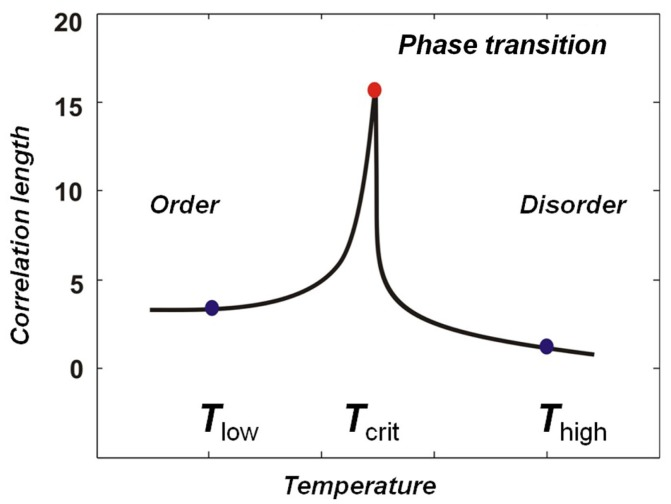

-------------------------------------------------------------------------------------------------------------------------------------------------

## Importamos los Datos de las Series de Tiempo

In [15]:
# Solo se corre cuando instalamos por primera ver nolds
#pip install nolds

In [16]:
# Importamos las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from statsmodels.graphics import tsaplots
from scipy.signal import welch
import nolds

# Graficaremos las Series de Tiempo en modo oscuro 
plt.style.use('dark_background')

# Importamos los datos (Omitimos las columnas con datos de tipo NA)
df_1 = pd.read_csv('Serie temporal 1.dat', delimiter='\t',usecols=[0, 2])
df_2 = pd.read_csv('Serie temporal 2.dat', delimiter='\t',usecols=[0, 2])
df_3 = pd.read_csv('Serie temporal 3.dat', delimiter='\t',usecols=[0, 2])

# Renombramos las columnas de cada data frame
df_1.rename(columns ={'0':'Tiempo','-0.00395':'Señal'},inplace=True)
df_2.rename(columns ={'0':'Tiempo','0.8902':'Señal'},inplace=True)
df_3.rename(columns ={'0':'Tiempo','0.18535':'Señal'},inplace=True)

## **Serie de Tiempo 1**

Text(0.5, 1.0, 'Serie de Tiempo 1')

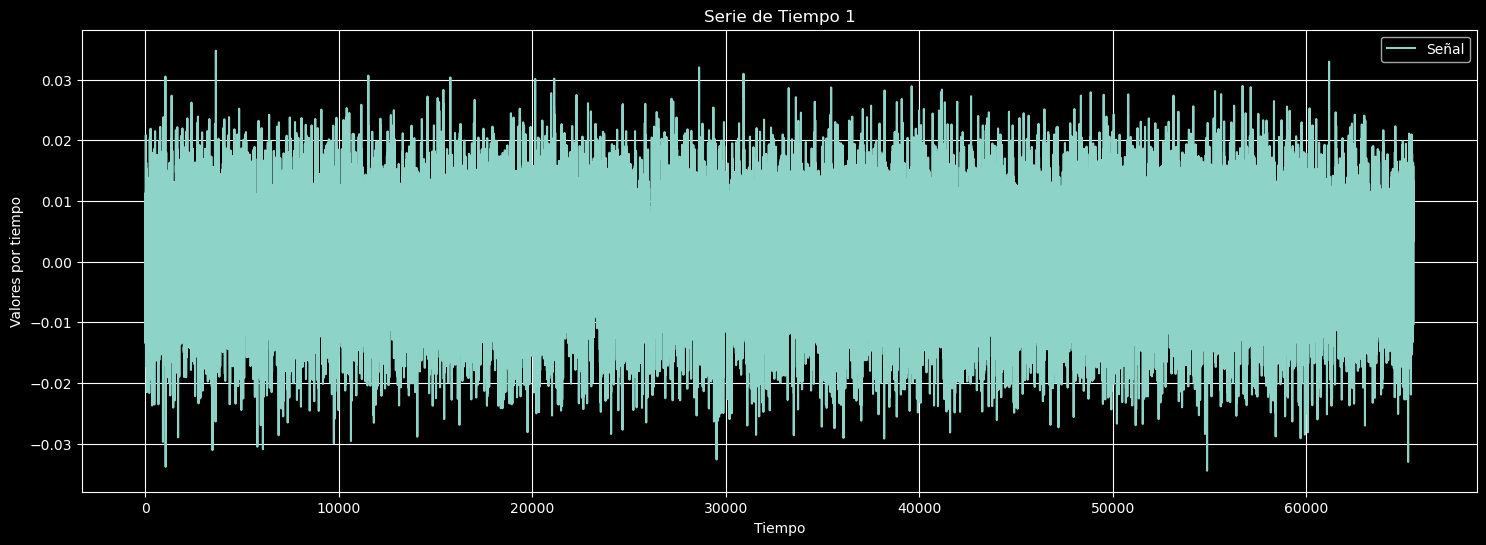

In [17]:
# Graficamos la primer serie de tiempo 
df_1.plot(x='Tiempo',y='Señal',figsize=(18,6))
plt.grid(True)
plt.xlabel('Tiempo')
plt.ylabel('Valores por tiempo')  
plt.title('Serie de Tiempo 1')   

### **Función de Autocorrelación (ACF)**

<Figure size 640x480 with 0 Axes>

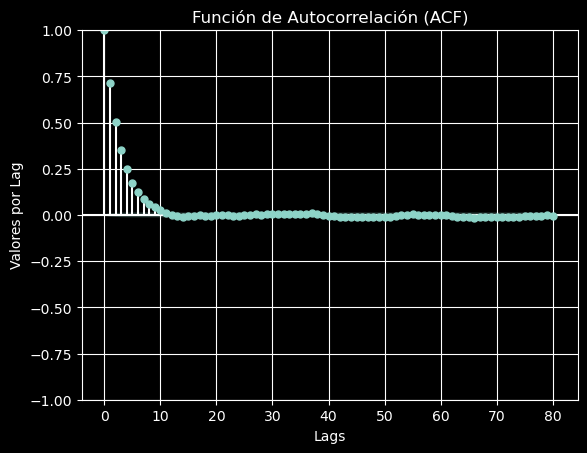

In [18]:
# Graficamos la Función de Autocorrelación 
plt.figure()
fig = tsaplots.plot_acf(df_1['Señal'],lags=80)
plt.grid(True)
plt.xlabel('Lags')
plt.ylabel('Valores por Lag')
plt.title('Función de Autocorrelación (ACF)')
plt.show()

### **Función PSD**

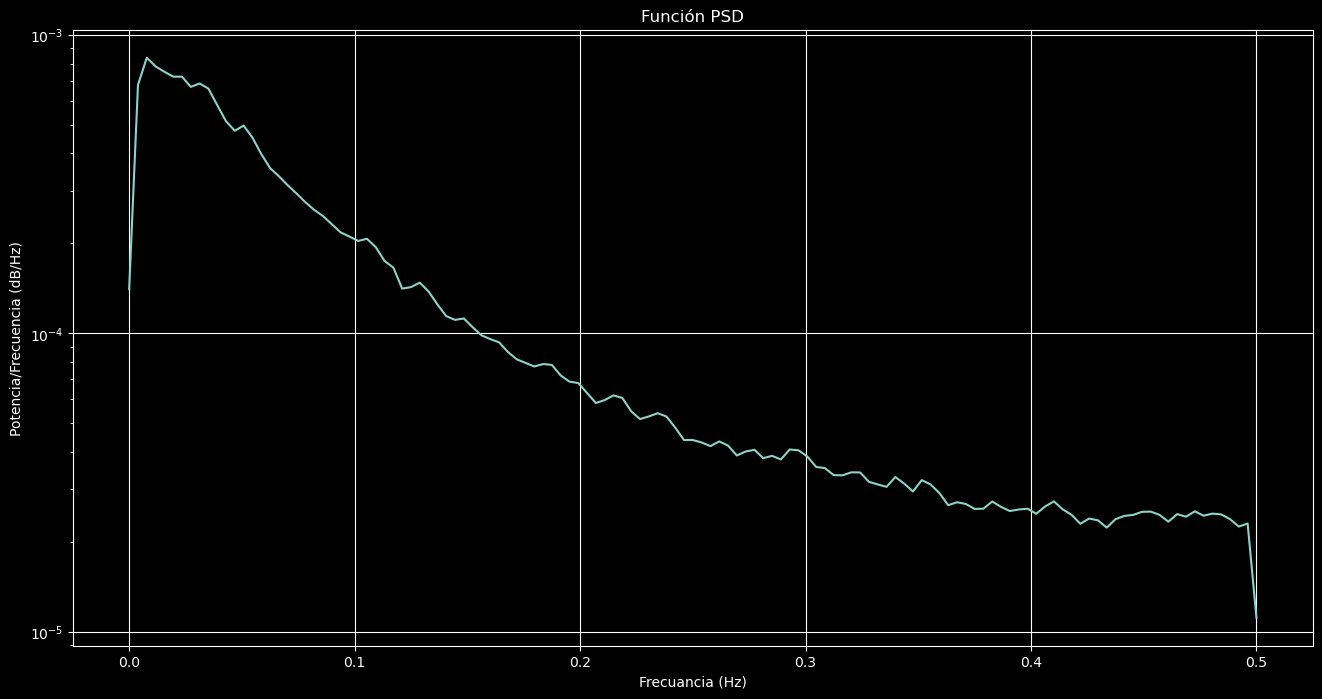

In [19]:
# Calculamos la función PSD a través del método de Welch
frecuencias_1, psd_1 = welch(df_1['Señal'], fs=1.0, nperseg=256)

# Graficamos la función PSD
plt.figure(figsize=(16, 8))
plt.semilogy(frecuencias_1, psd_1)
plt.title('Función PSD')
plt.xlabel('Frecuancia (Hz)')
plt.ylabel('Potencia/Frecuencia (dB/Hz)')
plt.grid(True)
plt.show()

### **Función PSD en Escala Log-Log**

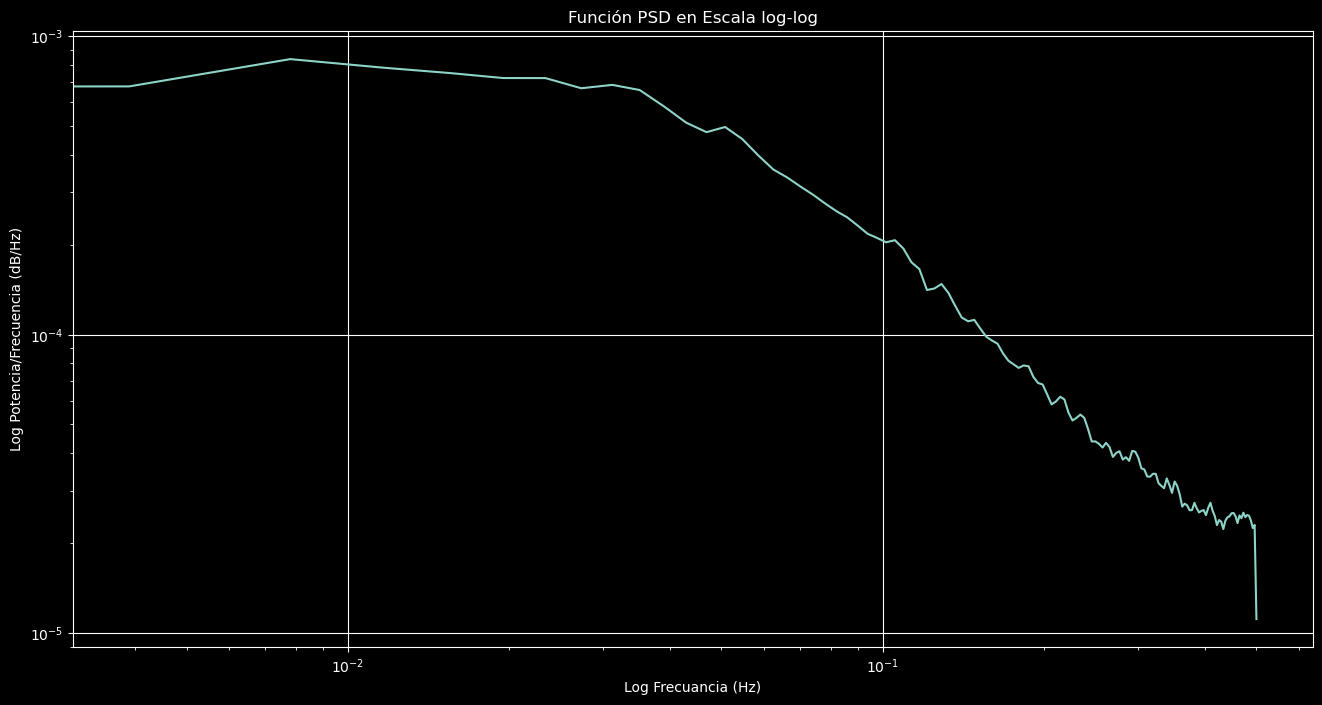

In [20]:
# Graficamos la función PSD en escala log-log
plt.figure(figsize=(16, 8))
plt.loglog(frecuencias_1, psd_1)
plt.title('Función PSD en Escala log-log')
plt.xlabel('Log Frecuancia (Hz)')
plt.ylabel('Log Potencia/Frecuencia (dB/Hz)')
plt.grid(True)
plt.show()

### **Calculamos el DFA**

Calculamos el valor $\alpha>0$ de la serie de tiempo 

In [37]:
# Calculamos el DFA de esta serie de tiempo
nolds.dfa(df_1['Señal'])

0.6422141046890155

Calculamos el valor $\beta=2\alpha-1$.

In [40]:
# Definimos el DFA
alpha_1 = nolds.dfa(df_1['Señal'])

# Calculamos el valor de beta
2*(alpha_1)-1

0.2506863804817727

## **Serie de Tiempo 2**

Text(0.5, 1.0, 'Serie de Tiempo 2')

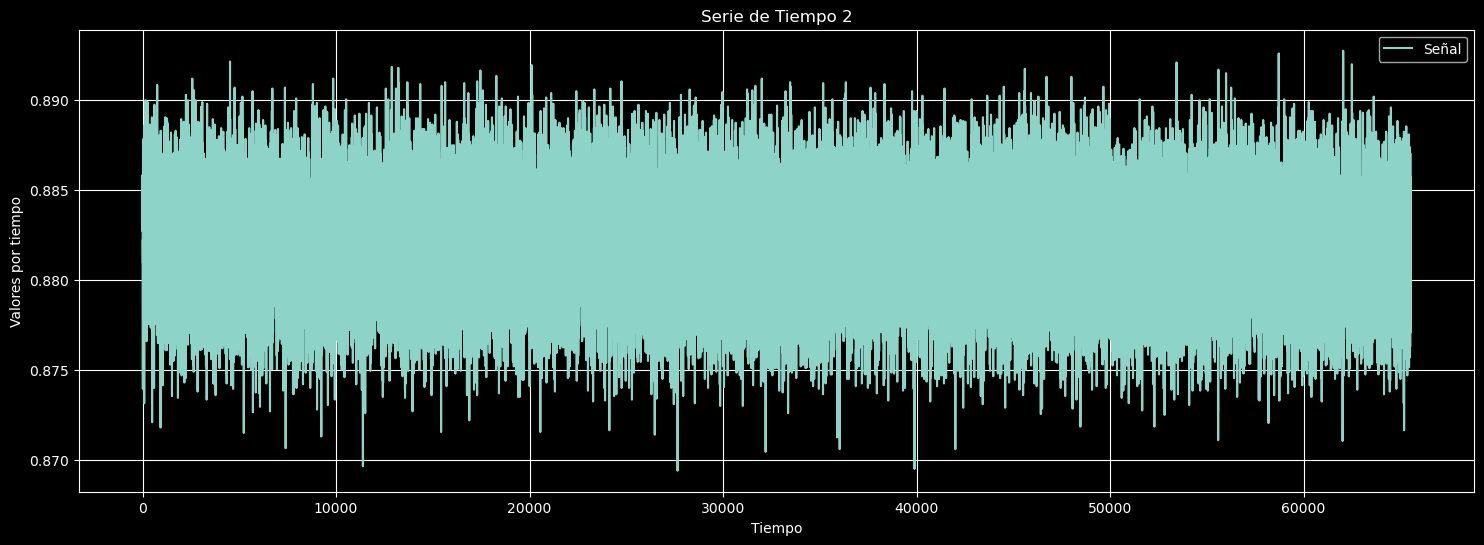

In [21]:
# Graficamos la segunda Serie de Tiempo
df_2.plot(x='Tiempo',y='Señal',figsize=(18,6))
plt.grid(True)
plt.xlabel('Tiempo')
plt.ylabel('Valores por tiempo')  
plt.title('Serie de Tiempo 2') 

### **Función de Autocorrelación (ACF)**

<Figure size 640x480 with 0 Axes>

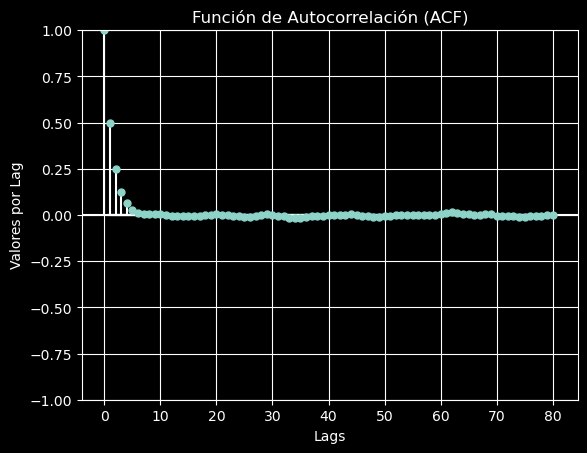

In [22]:
# Graficamos la Función de Autocorrelación 
plt.figure()
fig = tsaplots.plot_acf(df_2['Señal'],lags=80)
plt.grid(True)
plt.xlabel('Lags')
plt.ylabel('Valores por Lag')
plt.title('Función de Autocorrelación (ACF)')
plt.show()

### **Función PSD**

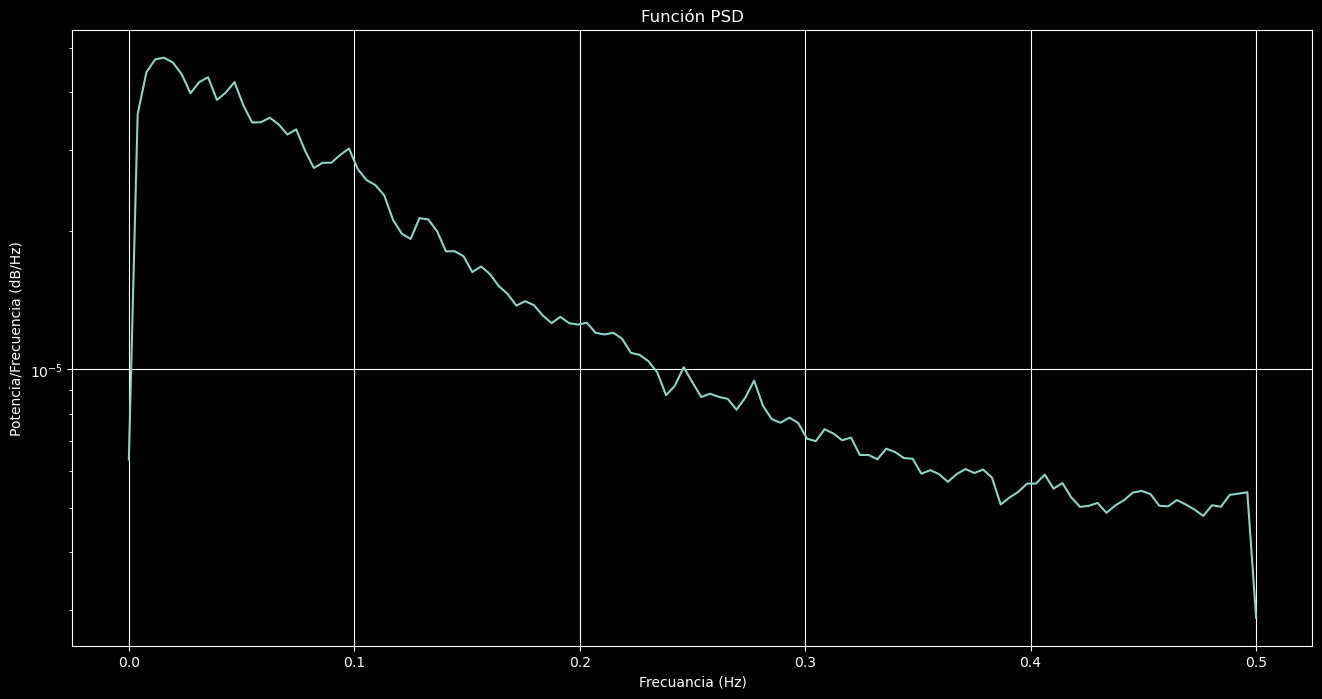

In [23]:
# Calculamos la función PSD a través del método de Welch
frecuencias_2, psd_2 = welch(df_2['Señal'], fs=1.0, nperseg=256)

# Graficamos la función PSD
plt.figure(figsize=(16, 8))
plt.semilogy(frecuencias_2, psd_2)
plt.title('Función PSD')
plt.xlabel('Frecuancia (Hz)')
plt.ylabel('Potencia/Frecuencia (dB/Hz)')
plt.grid(True)
plt.show()

### **Función PSD en Escala Log-Log**

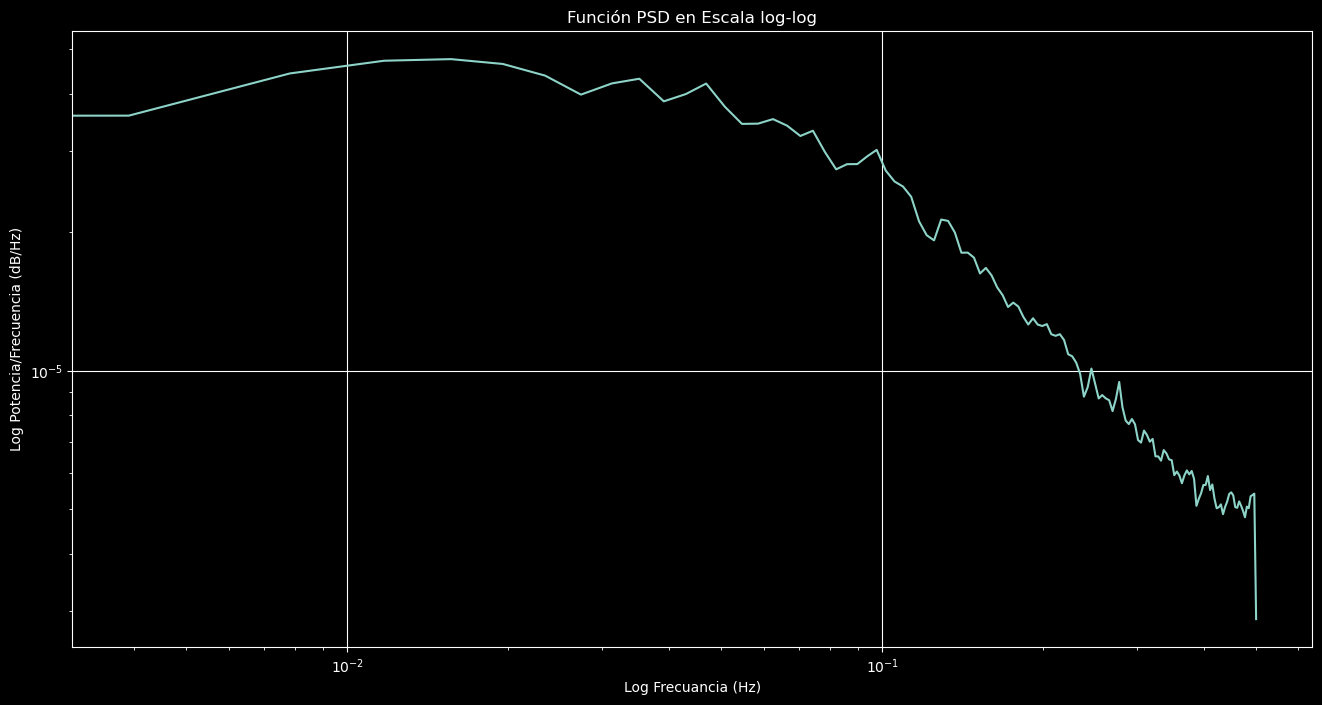

In [24]:
# Graficamos la función PSD en escala log-log
plt.figure(figsize=(16, 8))
plt.loglog(frecuencias_2, psd_2)
plt.title('Función PSD en Escala log-log')
plt.xlabel('Log Frecuancia (Hz)')
plt.ylabel('Log Potencia/Frecuencia (dB/Hz)')
plt.grid(True)
plt.show()

### **Calculamos el DFA**

Calculamos el valor $\alpha>0$ de la serie de tiempo 

In [39]:
# Calculamos el DFA de esta serie de tiempo
nolds.dfa(df_2['Señal'])

0.5784273338492214

Calculamos el valor $\beta=2\alpha-1$.

In [41]:
# Definimos el DFA
alpha_2 = nolds.dfa(df_2['Señal'])

# Calculamos el valor de beta
2*(alpha_2)-1

0.1568546676984428

## **Serie de Tiempo 3**

Text(0.5, 1.0, 'Serie de Tiempo 3')

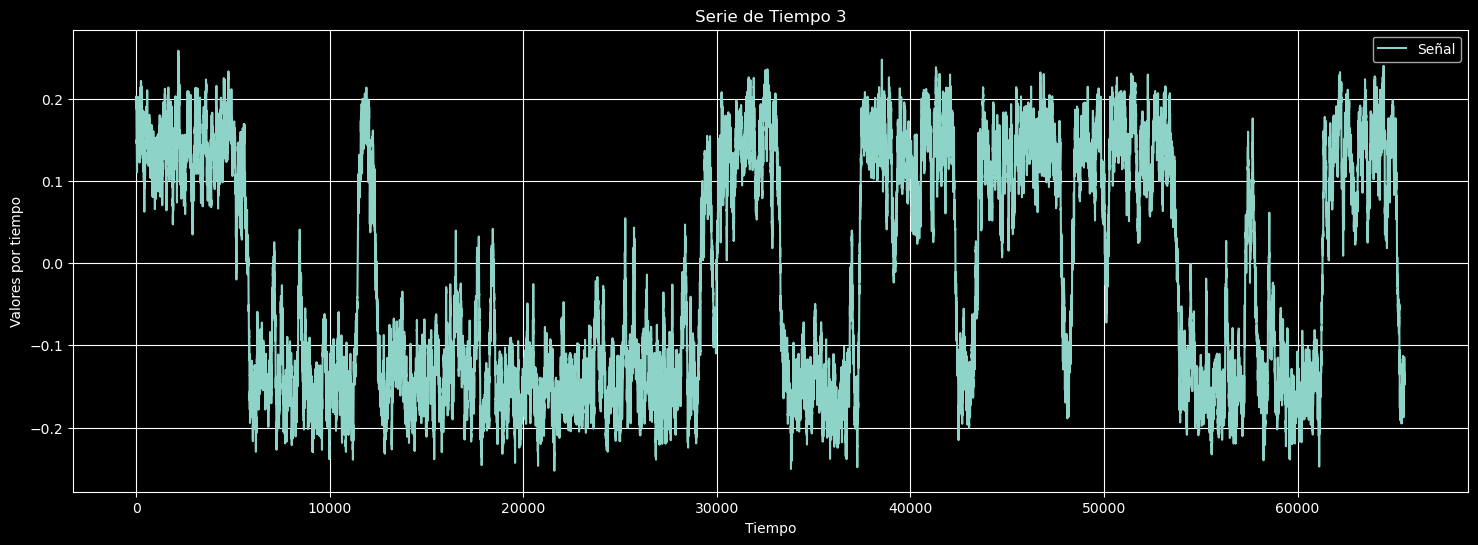

In [25]:
# Graficamos la tercer Serie de Tiempo
df_3.plot(x='Tiempo',y='Señal',figsize=(18,6))
plt.grid(True)
plt.xlabel('Tiempo')
plt.ylabel('Valores por tiempo')  
plt.title('Serie de Tiempo 3') 

### **Función de Autocorrelación (ACF)**

<Figure size 640x480 with 0 Axes>

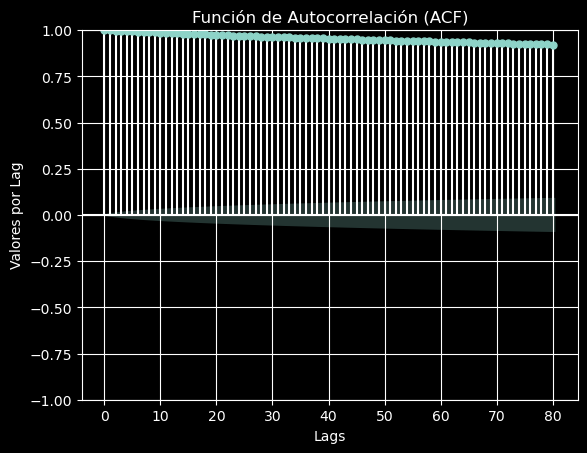

In [26]:
# Graficamos la Función de Autocorrelación 
plt.figure()
fig = tsaplots.plot_acf(df_3['Señal'],lags=80)
plt.grid(True)
plt.xlabel('Lags')
plt.ylabel('Valores por Lag')
plt.title('Función de Autocorrelación (ACF)')
plt.show()

### **Función PSD**

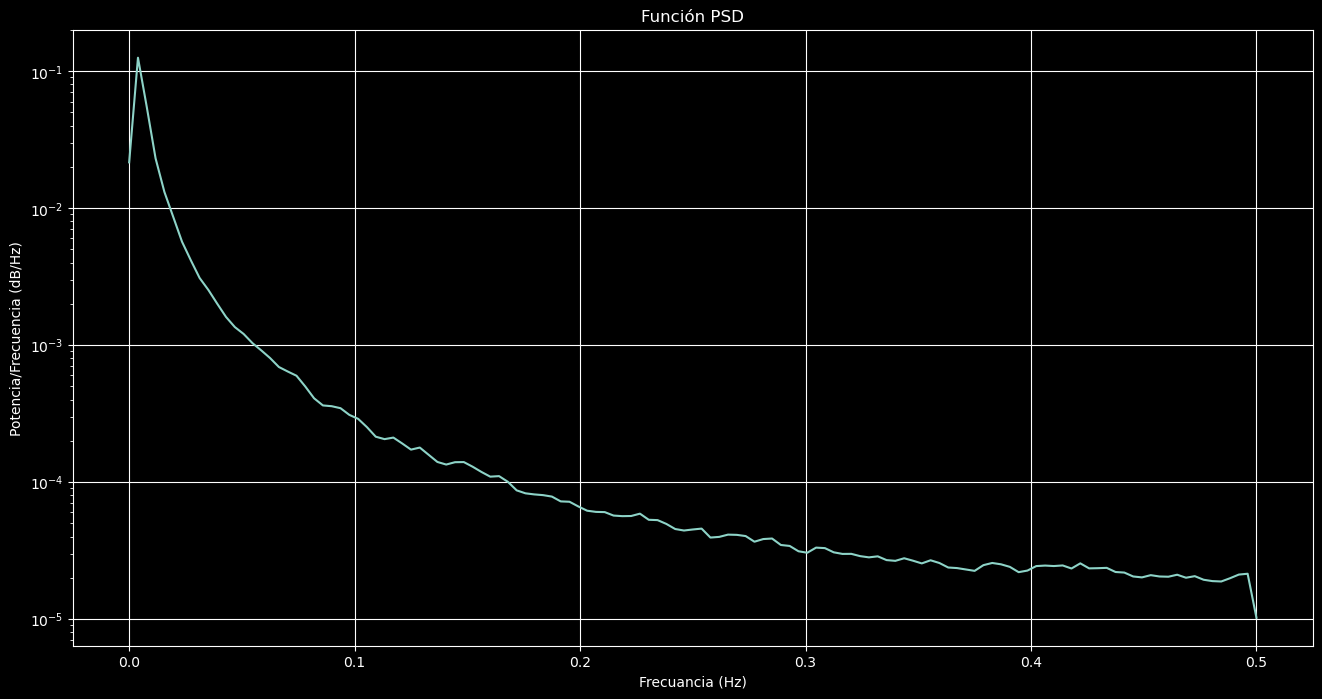

In [27]:
# Calculamos la función PSD a través del método de Welch
frecuencias_3, psd_3 = welch(df_3['Señal'], fs=1.0, nperseg=256)

# Graficamos la función PSD
plt.figure(figsize=(16, 8))
plt.semilogy(frecuencias_3, psd_3)
plt.title('Función PSD')
plt.xlabel('Frecuancia (Hz)')
plt.ylabel('Potencia/Frecuencia (dB/Hz)')
plt.grid(True)
plt.show()

### **Función PSD en Escala Log-Log**

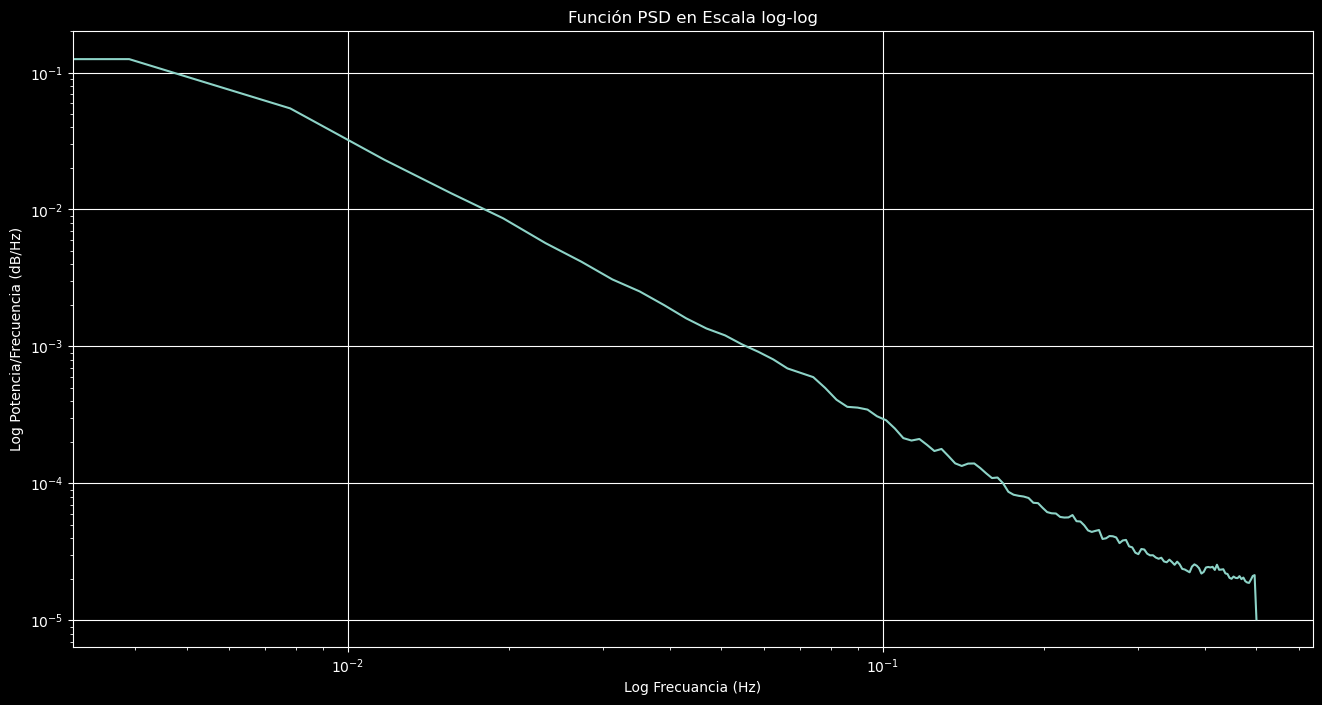

In [28]:
# Graficamos la función PSD en escala log-log
plt.figure(figsize=(16, 8))
plt.loglog(frecuencias_3, psd_3)
plt.title('Función PSD en Escala log-log')
plt.xlabel('Log Frecuancia (Hz)')
plt.ylabel('Log Potencia/Frecuencia (dB/Hz)')
plt.grid(True)
plt.show()

### **Calculamos el DFA**

Calculamos el valor $\alpha>0$ de la serie de tiempo.

In [35]:
# Calculamos el DFA de esta serie de tiempo
nolds.dfa(df_3['Señal'])

1.3444084696123084

Calculamos el valor $\beta=2\alpha-1$.

In [42]:
# Definimos el DFA
alpha_3 = nolds.dfa(df_3['Señal'])

# Calculamos el valor de beta
2*(alpha_3)-1

1.6888169392246168

## **Observaciones**

**(1)** A primera vista, podemos aventurarnos a decir que la tercer serie de tiempo corresponde a la fase crítica, pues su gráfica parece mostrar muchas más correlaciones temporales que la primer y segunda serie de tiempo. 

**(2)** Una vez que graficamos el PSD de cada serie de tiempo, podemos decir lo siguiente:
* La primer serie de tiempo, en comparación con la segunda serie de tiempo, presenta un decaimiento más suave en su PSD en escala log-log. Por otro lado, la segunda serie de tiempo, presenta un comportamiento un poco más errático en su PSD en escala log-log. Por lo tanto, la primera serie de tiempo corresponde al estado ordenado, mientras que la segunda serie de tiempo, corresponde al estado caótico. 

* Para la tercer serie de tiempo, se presenta un comportamiento lineal en su PSD en escala log-log. Esto nos dice que la tercer serie de tiempo sigue una ley de potencias. 

**(3)** Para la función de autocorrelación, observamos lo siguiente:
* Tanto la primer y segunda serie de tiempo nos muestran muy pocas correlaciones temporales (solo en escalas pequeñas).  
* Por otro lado, la función de autocorrelación en la tercer serie de tiempo, nos muestra correlaciones temporales a todas las escalas. 

**(4)** Dadas las observaciones hechas de la tercer serie de tiempo sobre su ACF y su PSD en escala log-log, podemos decir que, en efecto, la tercer serie de tiempo corresponde al estado crítico, en el cuál se pueden ver correlaciones a todas las escalas e invarianza de escala (ley de potencias). 

**(5)** De acuerdo a los resultados que obtuvimos en el DFA de cada serie, podemos decir lo siguiente:
* La primer serie de tiempo nos da el siguiente DFA: $\frac{1}{2}<\alpha=0.6422141046890155<1$. Es decir, la primer serie presenta correlación positiva para ciertos lags (retrasos de tiempo) pero no son a todas las escalas.  
* La segunda serie de tiempo nos da el siguiente DFA: $\alpha=0.5784273338492214\simeq\frac{1}{2}$. En este caso, la serie de tiempo se parece a un ruido blanco, lo que significa que las correlaciones temporales tienden a no exisir. 
* La tercer serie de tiempo nos da el siguiente DFA: $\alpha=1.3444084696123084>1$. Esta es otra forma de comprobar que la tercer serie de tiempo corresponde al estado crítico del sistema, pues existen correlaciones a toda escala de tiempo. 

**(6)** Por lo tanto, podemos concluir que, de acuerdo a nuestro análisis, se concluye lo siguiente:
* **Primer Serie de Tiempo:** Estado Ordenado.
* **Segunda Serie de Tiempo:** Estado Caótico.
* **Tercer Serie de Tiempo:** Estado Crítico.  